### The features from this dataset

The dataset consists of the following fields:

• Loan ID: A unique Identifier for the loan information.

• Customer ID: A unique identifier for the customer. Customers may have more than one loan.

• Loan Status: A categorical variable indicating if the loan was paid back or defaulted.

• Current Loan Amount: This is the loan amount that was either completely paid off, or the amount that was defaulted.

• Term: A categorical variable indicating if it is a short term or long term loan.

• Credit Score: A value between 0 and 800 indicating the riskiness of the borrowers credit history.

• Years in current job: A categorical variable indicating how many years the customer has been in their current job.

• Home Ownership: Categorical variable indicating home ownership. Values are "Rent", "Home Mortgage", and "Own". If the value is OWN, then the customer is a home owner with no mortgage

• Annual Income: The customer's annual income

• Purpose: A description of the purpose of the loan.

• Monthly Debt: The customer's monthly payment for their existing loans

• Years of Credit History: The years since the first entry in the customer’s credit history

• Months since last delinquent: Months since the last loan delinquent payment

• Number of Open Accounts: The total number of open credit cards

• Number of Credit Problems: The number of credit problems in the customer records.

• Current Credit Balance: The current total debt for the customer

• Maximum Open Credit: The maximum credit limit for all credit sources.

• Bankruptcies: The number of bankruptcies

• Tax Liens: The number of tax liens.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

%matplotlib inline

In [2]:
df = pd.read_csv('Loan-20Granting-20Binary-20Classification.csv')
df.isnull().values.any()

True

In [3]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21337
Years in current job                0
Home Ownership                      0
Annual Income                   21337
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 0
Bankruptcies                      228
Tax Liens                          11
dtype: int64

In [4]:
print('The Percentage of missing values for Credit Score :', df['Credit Score'].isnull().sum()/len(df)*100,'%')
print('The Percentage of missing values for Annual Income :', df['Annual Income'].isnull().sum()/len(df)*100,'%')
print('The Percentage of missing values for Months since last delinquent :', df['Months since last delinquent'].\
      isnull().sum()/len(df)*100,'%')
print('The Percentage of missing values for Bankruptcies :', df['Bankruptcies'].isnull().sum()/len(df)*100,'%')
print('The Percentage of missing values for Tax Liens :', df['Tax Liens'].isnull().sum()/len(df)*100,'%')

The Percentage of missing values for Credit Score : 19.2043562396 %
The Percentage of missing values for Annual Income : 19.2043562396 %
The Percentage of missing values for Months since last delinquent : 53.1056208091 %
The Percentage of missing values for Bankruptcies : 0.205211286621 %
The Percentage of missing values for Tax Liens : 0.00990054452995 %


In [5]:
print(df.columns.values)
print(df.shape)

['Loan ID' 'Customer ID' 'Loan Status' 'Current Loan Amount' 'Term'
 'Credit Score' 'Years in current job' 'Home Ownership' 'Annual Income'
 'Purpose' 'Monthly Debt' 'Years of Credit History'
 'Months since last delinquent' 'Number of Open Accounts'
 'Number of Credit Problems' 'Current Credit Balance' 'Maximum Open Credit'
 'Bankruptcies' 'Tax Liens']
(111105, 19)


In [6]:
df.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,"1,244.02",16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [7]:
# map 'Charged Off' to 0 and 'Fully Paid' to 1 on 'Loan Status'
df['Loan_status'] = df['Loan Status'].map({'Charged Off':0, 'Fully Paid':1})
df.loc[0:len(df), ['Loan Status', 'Loan_status']].head()  

,Loan Status,Loan_status
0,Charged Off,0
1,Charged Off,0
2,Charged Off,0
3,Charged Off,0
4,Charged Off,0


In [8]:
df.head()
df.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens', 'Loan_status'],
      dtype='object')

In [9]:
# Removing 'Loan Status' Column
df.drop(['Loan ID','Customer ID','Loan Status'], axis=1, inplace=True)
df.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_status
0,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0,0
1,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0,0
2,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,"1,244.02",16.7,32.0,11,1,11275,14815,1.0,0.0,0
3,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0,0
4,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0,0


In [10]:
df.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_status
0,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0,0
1,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0,0
2,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,"1,244.02",16.7,32.0,11,1,11275,14815,1.0,0.0,0
3,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0,0
4,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0,0


In [11]:
df.dropna(inplace=True)
df.head()

,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_status
0,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0,0
2,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,"1,244.02",16.7,32.0,11,1,11275,14815,1.0,0.0,0
4,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0,0
9,9796,Long Term,6720.0,< 1 year,Rent,58776.0,Debt Consolidation,666.13,9.4,17.0,12,0,4939,15198,0.0,0.0,0
10,19838,Long Term,7010.0,6 years,Home Mortgage,79352.0,Debt Consolidation,"1,051.41",14.3,6.0,13,0,15780,22511,0.0,0.0,0


In [12]:
df.shape

(42201, 17)

In [13]:
df['Term'].unique()

array(['Short Term', 'Long Term'], dtype=object)

In [14]:
df['Years in current job'].unique()

array(['< 1 year', '9 years', '10+ years', '6 years', '3 years', '4 years',
       '2 years', '8 years', 'n/a', '1 year', '7 years', '5 years'], dtype=object)

In [15]:
df['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home', 'HaveMortgage'], dtype=object)

In [16]:
df.dtypes

Current Loan Amount               int64
Term                             object
Credit Score                    float64
Years in current job             object
Home Ownership                   object
Annual Income                   float64
Purpose                          object
Monthly Debt                     object
Years of Credit History         float64
Months since last delinquent    float64
Number of Open Accounts           int64
Number of Credit Problems         int64
Current Credit Balance            int64
Maximum Open Credit               int64
Bankruptcies                    float64
Tax Liens                       float64
Loan_status                       int64
dtype: object

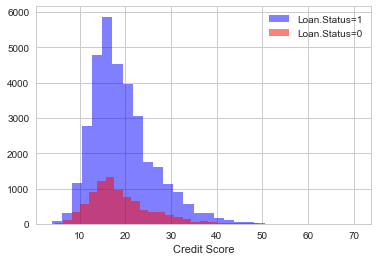

In [17]:
df[df['Loan_status']==1]['Years of Credit History'].hist(alpha=0.5,color='blue',bins=30,label='Loan.Status=1')
df[df['Loan_status']==0]['Years of Credit History'].hist(alpha=0.5,color='red',bins=30,label='Loan.Status=0')
plt.legend()
plt.xlabel('Credit Score')
plt.show()

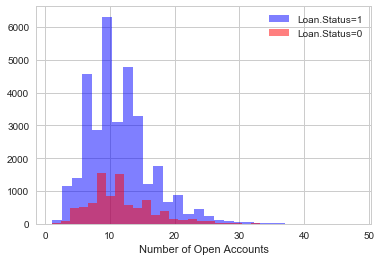

In [18]:
df[df['Loan_status']==1]['Number of Open Accounts'].hist(alpha=0.5,color='blue',bins=30,label='Loan.Status=1')
df[df['Loan_status']==0]['Number of Open Accounts'].hist(alpha=0.5,color='red',bins=30,label='Loan.Status=0')
plt.legend()
plt.xlabel('Number of Open Accounts')
plt.show()

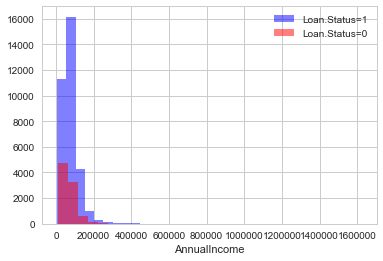

In [19]:
df[df['Loan_status']==1]['Annual Income'].hist(alpha=0.5,color='blue',bins=30,label='Loan.Status=1')
df[df['Loan_status']==0]['Annual Income'].hist(alpha=0.5,color='red',bins=30,label='Loan.Status=0')
plt.legend()
plt.xlabel('AnnualIncome')
plt.show()

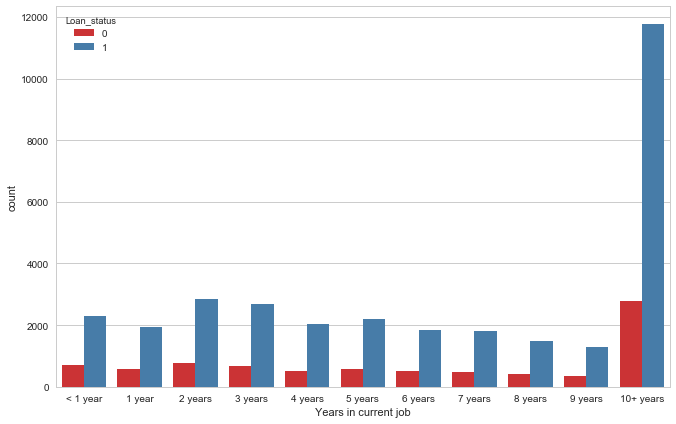

In [20]:
plt.figure(figsize=(11,7))
sns.countplot(x='Years in current job', hue='Loan_status', data=df,palette='Set1',\
              order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years',\
                    '8 years','9 years','10+ years'])
plt.show()

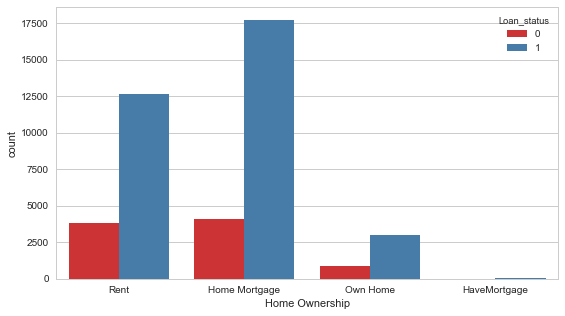

In [21]:
plt.figure(figsize=(9,5))
sns.countplot(x='Home Ownership', hue='Loan_status', data=df,palette='Set1')
plt.show()

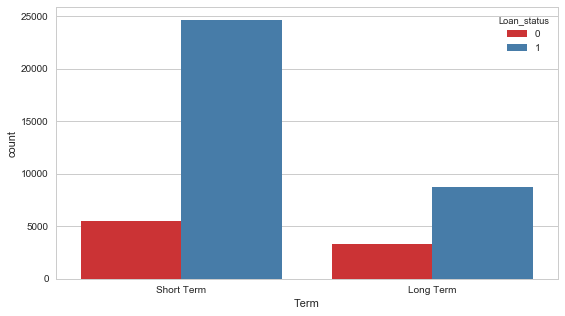

In [22]:
plt.figure(figsize=(9,5))
sns.countplot(x='Term', hue='Loan_status', data=df,palette='Set1')
plt.show()

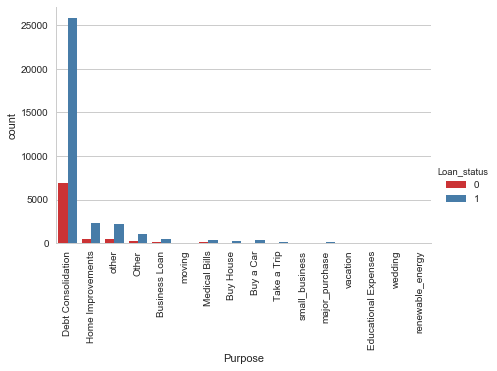

In [23]:
sns.factorplot('Purpose', data = df, aspect = 1.5, kind = 'count', palette = 'Set1',hue='Loan_status').set_xticklabels(rotation = 90)
plt.show()

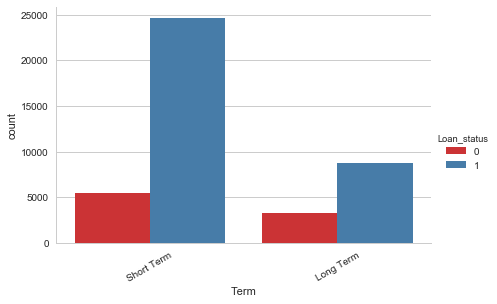

In [24]:
plt.figure(figsize=(9,5))
sns.factorplot('Term', data = df, aspect = 1.5, kind = 'count', palette = 'Set1',hue='Loan_status').set_xticklabels(rotation = 30)
plt.show()

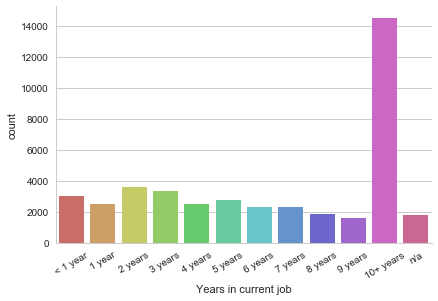

In [25]:
sns.factorplot('Years in current job', data = df, aspect = 1.5, kind = 'count', palette = 'hls',\
               order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years','n/a']).\
set_xticklabels(rotation = 30)
plt.show()

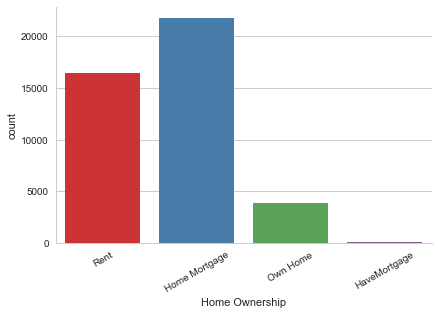

In [26]:
sns.factorplot('Home Ownership', data = df, aspect = 1.5, kind = 'count', palette = 'Set1').set_xticklabels(rotation = 30)
plt.show()

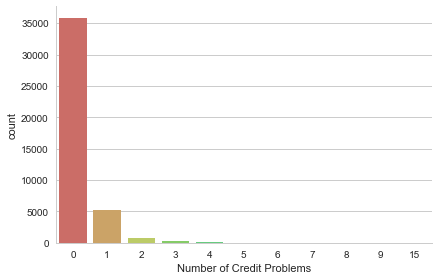

In [27]:
sns.factorplot('Number of Credit Problems', data = df, aspect = 1.5, kind = 'count', palette = 'hls')
plt.show()

In [28]:
n = []
for x in range(1500,2701):
    if (x%7==0) and (x%5==0):
        n.append(str(x))
print(','.join(n))

1505,1540,1575,1610,1645,1680,1715,1750,1785,1820,1855,1890,1925,1960,1995,2030,2065,2100,2135,2170,2205,2240,2275,2310,2345,2380,2415,2450,2485,2520,2555,2590,2625,2660,2695
